# A small League of Legend items walkaround

### Importing packages

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, SpectralClustering
import plotly.express as px
from sklearn.metrics import silhouette_samples, silhouette_score

## Preprocessing the dataset

| Feature               | Description                                                                                      |
|-----------------------|--------------------------------------------------------------------------------------------------|
| Item                  | Full name of the item                                                                            |
| Cost                  | Cost of the item                                                                                 |
| Sell                  | Sell of the item                                                                                 |
| AD                    | Attack Damage                                                                                    |
| AS                    | Attack Speed                                                                                     |
| Crit                  | Chance of critical hit                                                                           |
| LS                    | Life steal                                                                                       |
| APen                  | Ability Penetration                                                                              |
| AP                    | Ability Power                                                                                    |
| AH                    | Ability Haste                                                                                    |
| Mana                  | Mana                                                                                             |
| MP5                   | Mana Regeneration per 5s                                                                         |
| HSP                   | Heal/Shield Power                                                                                |
| OVamp                 | Omnivamp                                                                                         |
| MPen                  | Magic Penetration                                                                                |
| Health                | Health                                                                                           |
| Armor                 | Armor                                                                                            |
| MR                    | Magic Resistance                                                                                 |
| HP5                   | Health regeneration per 5s                                                                       |
| MS                    | Movement Speed                                                                                   |
| Maps                  | Maps where the item is available                                                                 |

### Getting the dataset

In [71]:
df = pd.read_csv('LOL_items_stats.csv', sep=';')
df.head()

,Item,Cost,Sell,AD,AS,Crit,LS,APen,AP,AH,...,MP5,HSP,OVamp,MPen,Health,Armor,MR,HP5,MS,Maps
0,Abyssal Mask,2700,1890.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,400.0,NaN,60.0,NaN,NaN,All
1,Aegis of the Legion,1500,1050.0,NaN,NaN,NaN,NaN,NaN,NaN,10.0,...,NaN,NaN,NaN,NaN,NaN,30.0,30.0,NaN,NaN,All
2,Aether Wisp,850,595.0,NaN,NaN,NaN,NaN,NaN,30.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,All
3,Amplifying Tome,435,304.5,NaN,NaN,NaN,NaN,NaN,20.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,All
4,Archangel's Staff,3000,2100.0,NaN,NaN,NaN,NaN,NaN,65.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,All


### Dataset curation

In [72]:
columns_to_keep = ["Cost", 
                   "Sell", 
                   "AD", 
                   "AS", 
                   "Crit", 
                   "LS", 
                   "APen", 
                   "AP", 
                   "AH", 
                   "Mana", 
                   "MP5", 
                   "HSP", 
                   "OVamp", 
                   "MPen", 
                   "Health", 
                   "Armor",
                   "MR",
                   "HP5",
                   "MS"]

# List of items names
names = df["Item"]
df_keep = df[columns_to_keep]


### Removing the NaN values

In [73]:
# Replace NaN values with 0
df_keep.fillna(0, inplace=True)

C:\Users\grego\AppData\Local\Temp\ipykernel_20008\3544182646.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Scaling the dataset

In [74]:
def scale_data(data):
    scaler = StandardScaler()
    return scaler.fit_transform(data)

X = scale_data(df_keep)

## Clustering

### Fitting the model

In [75]:
def kmeans_clustering(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=69)
    kmeans.fit(data)
    return kmeans.labels_

def spectral_clustering(data, n_clusters):
    spectral_clustering = SpectralClustering(n_clusters=n_clusters, random_state=69)
    spectral_clustering.fit(data)
    return spectral_clustering.labels_

### Chosing the number of cluster

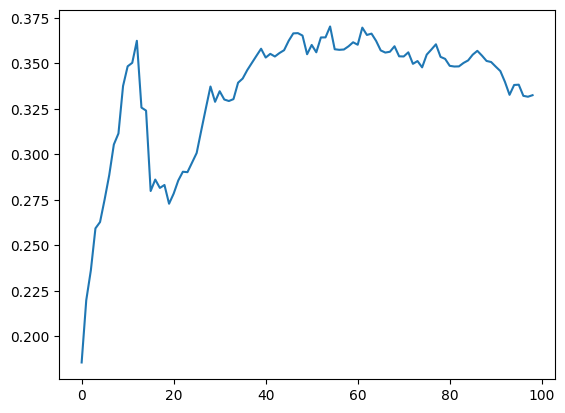

In [76]:
# Find the best number of clusters using the silhouette score and plot the silhouette plot
def find_best_n_clusters(data, max_clusters):
    silhouette_scores = []
    for n_clusters in range(2, max_clusters+1):
        z = kmeans_clustering(data, n_clusters)
        silhouette_avg = silhouette_score(data, z)
        silhouette_scores.append(silhouette_avg)
    return silhouette_scores

silhouette_scores = find_best_n_clusters(X, 100)
plt.plot(silhouette_scores)


### Fixing the clustering

In [77]:
n_clusters = 50
y = kmeans_clustering(X, n_clusters=n_clusters)
#y = spectral_clustering(X, n_clusters=n_clusters)

## Visualization

In [78]:
def normalize_data(data):
    return (data - data.min()) / (data.max() - data.min())

### 2D PCA

In [79]:
pca2 = PCA(n_components=2)
X_pca2 = pca2.fit_transform(X)

X_pca2 = pd.DataFrame(X_pca2, columns=["PC1", "PC2"])

# Normalize the data
X_pca2["PC1"] = normalize_data(X_pca2["PC1"])
X_pca2["PC2"] = normalize_data(X_pca2["PC2"])

In [80]:
fig = px.scatter(X_pca2, x='PC1', y='PC2', color=y, color_continuous_scale="Portland" ,width=800, height=800)
fig.update_layout(title="Items Visualization in 3D")
fig.show()

### 3D PCA

In [81]:
pca3 = PCA(n_components=3)
X_pca3 = pca3.fit_transform(X)

X_pca3 = pd.DataFrame(X_pca3, columns=["PC1", "PC2", "PC3"])

# Normalize the data
X_pca3["PC1"] = normalize_data(X_pca3["PC1"])
X_pca3["PC2"] = normalize_data(X_pca3["PC2"])
X_pca3["PC3"] = normalize_data(X_pca3["PC3"])


In [82]:
# Plot the data in 3D
fig = px.scatter_3d(X_pca3, x='PC1', y='PC2', z='PC3', color=y, color_continuous_scale="Portland")
fig.update_layout(title="Items Visualization in 3D")
fig.update_traces(marker=dict(size=3))
fig.show()


### Which items are similar ?

In [84]:
df_clusters = pd.DataFrame({"Item": names, "Cluster": y})
df_clusters.head()

,Item,Cluster
0,Abyssal Mask,1
1,Aegis of the Legion,35
2,Aether Wisp,23
3,Amplifying Tome,23
4,Archangel's Staff,18
